# Numerical Differentiation and Integration

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

## Numerical Differentiation

Numerical differentiation is approximating the derivative of a differentiable function at a given point by using well defined numerical methods. Finite difference approximation is one specific type of numerical differentiation method. Finite difference approximation is an expression that approximates the derivative of a function at a point by using neighborhood of the point. The common methods of finite difference approximation of first derivative are **the forward difference, the backward difference, and the central difference**. (Refer AM2013 course notes for more details)



1.   Forward difference
$$
f'(x) = \frac{f(x+h)-f(x)}{h} + O(h)
$$
2.   Backward difference
$$
f'(x) = \frac{f(x)-f(x-h)}{h} + O(h)
$$
3.   Central difference
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + O(h^2)
$$



In [2]:
def num_diff(f, x, h, method):
  """
  Fuction to compute the numberical diferentiation.
  """
  method = method.lower()
  if method == "forward":
    return (f(x+h) - f(x)) / h
  elif method == "backward":
    return (f(x) - f(x-h)) / h
  elif method == "central":
    return (f(x+h) - f(x-h)) / (2*h)
  else:
    print("Invalid numerical differentiation method")
    return None

Let's define a function such that $f(x) = e^{cos(x)}sin \left( \frac{3x}{2} \right)$. This function is differentiable on $ℝ$. First let's find the first derivative of this function analytically at $x=2$.
$$
f'(x) = \left[ \frac{3}{2}cos \left( \frac{3x}{2} \right) - sin \left( \frac{3x}{2} \right)sin(x) \right]e^{cos(x)}\\
$$
Here to find analytical solution **SymPy** package is used.

In [3]:
x = smp.symbols('x', real=True)
f = smp.exp(smp.cos(x))*smp.sin(smp.Rational(3, 2)*x)
display(f)

exp(cos(x))*sin(3*x/2)

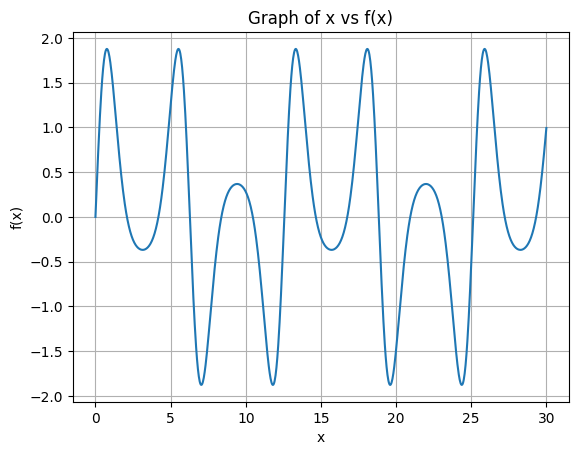

In [4]:
x_arr = np.linspace(0, 30, 1000)

plt.figure()
plt.plot(x_arr, smp.lambdify(x, f)(x_arr))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of x vs f(x)")
plt.grid()
plt.show()

In [5]:
df = smp.diff(f, x).simplify()
display(df)

(-sin(x)*sin(3*x/2) + 3*cos(3*x/2)/2)*exp(cos(x))

In [6]:
# Analytical solution of first derivative at x=2
sol_analytical = df.subs([(x, 2)]).evalf()
print(f"Analytical solution = {sol_analytical}")

Analytical solution = -1.06411172696131


Now let's find the numerical approximattion for $f'(2)$.

In [7]:
f_func = lambda x: np.exp(np.cos(x))*np.sin((3*x)/2)
percent_err_func = lambda sol_numerical, sol_analytical: np.abs((sol_numerical-sol_analytical)/sol_analytical)*100

In [8]:
h = 0.01    # step size
a = 2       # point that evaluate f'(x)

In [9]:
sol_numerical = num_diff(f_func, a, h, method='forward')
print(f"f\'(2) by forward difference = {sol_numerical}")

sol_numerical = num_diff(f_func, a, h, method='backward')
print(f"f\'(2) by backward difference = {sol_numerical}")

sol_numerical = num_diff(f_func, a, h, method='central')
print(f"f\'(2) by central difference = {sol_numerical}")

f'(2) by forward difference = -1.0556904271265015
f'(2) by backward difference = -1.0725652976923474
f'(2) by central difference = -1.0641278624094246


In [10]:
sol_numerical = num_diff(f_func, a, h, method='forward')
print(f"% error by forward difference = {percent_err_func(sol_numerical, sol_analytical)} %")

sol_numerical = num_diff(f_func, a, h, method='backward')
print(f"% error by backward difference = {percent_err_func(sol_numerical, sol_analytical)} %")

sol_numerical = num_diff(f_func, a, h, method='central')
print(f"% error by central difference = {percent_err_func(sol_numerical, sol_analytical)} %")

% error by forward difference = 0.791392446999782 %
% error by backward difference = 0.794425107519042 %
% error by central difference = 0.00151633025964052 %


Let's find the variation of percentage error with respect to step size $(h)$.

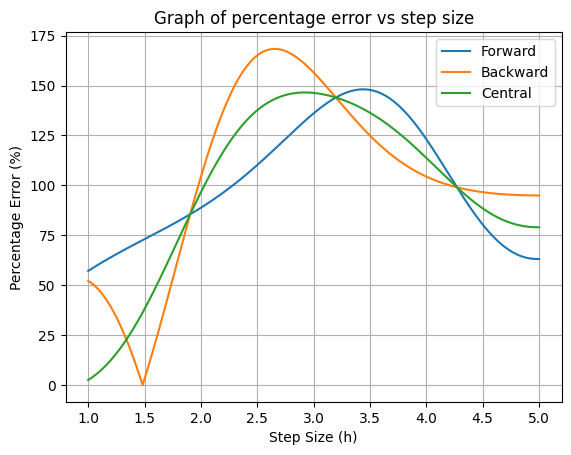

In [11]:
# For h>=1
h_arr = np.linspace(1, 5, 200)

plt.figure()
sol_numerical = num_diff(f_func, a, h_arr, method='forward')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Forward")
sol_numerical = num_diff(f_func, a, h_arr, method='backward')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Backward")
sol_numerical = num_diff(f_func, a, h_arr, method='central')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Central")
plt.xlabel("Step Size (h)")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs step size")
plt.legend()
plt.grid()
plt.show()

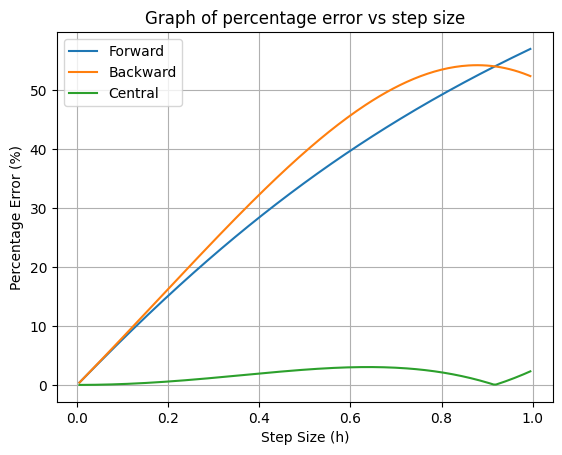

In [12]:
# For 0<h<1
h_arr = np.linspace(0, 1, 200)[1:-1]

plt.figure()
sol_numerical = num_diff(f_func, a, h_arr, method='forward')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Forward")
sol_numerical = num_diff(f_func, a, h_arr, method='backward')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Backward")
sol_numerical = num_diff(f_func, a, h_arr, method='central')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Central")
plt.xlabel("Step Size (h)")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs step size")
plt.legend()
plt.grid()
plt.show()

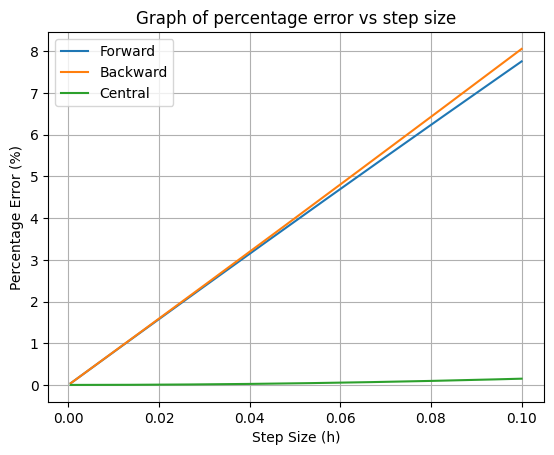

In [13]:
# For 0<h<=0.1
h_arr = np.linspace(0, 0.1, 200)[1:]

plt.figure()
sol_numerical = num_diff(f_func, a, h_arr, method='forward')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Forward")
sol_numerical = num_diff(f_func, a, h_arr, method='backward')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Backward")
sol_numerical = num_diff(f_func, a, h_arr, method='central')
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical), label="Central")
plt.xlabel("Step Size (h)")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs step size")
plt.legend()
plt.grid()
plt.show()

By above graphs, whenever **$h→0$ the percentage error decreases**. That implies that **the accuracy of approximation increases whenever $h→0$**. And also the best approximation for first derivative gives by the central difference method for this function than backward and forward difference methods whenever $h→0$.

Central drifference method can also be used to approximate the second order derivative of a function.


1.   Central difference method for First derivative
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + O(h^2)
$$
2.   Central difference method for Second derivative
$$
f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h^2)
$$


In [14]:
def central_diff(f, x, h, order=1):
  """
  Function to calculate the first or second order derivative by central difference method.
  """
  if order == 1:
    return (f(x+h)-f(x-h)) / (2*h)
  elif order == 2:
    return (f(x+h) - 2*f(x) + f(x-h)) / h**2
  else:
    print("Invalid order")
    return None

The analytical solution for second order derivative of $f(x) = e^{cos(x)}sin \left( \frac{3x}{2} \right)$ can be compute easily by using **SymPy** package.

In [15]:
x = smp.symbols('x', real=True)
f = smp.exp(smp.cos(x))*smp.sin(smp.Rational(3, 2)*x)
display(f)

exp(cos(x))*sin(3*x/2)

In [16]:
d2f = smp.diff(f, x, 2).simplify()
display(d2f)

(5*sin(x/2) - 7*sin(3*x/2) - 8*sin(5*x/2) - sin(7*x/2))*exp(cos(x))/4

In [17]:
# Analytical solution of f''(2)
sol_analytical = d2f.subs([(x, 2)]).evalf()
print(f"Analytical solution = {sol_analytical}")

Analytical solution = 1.68753137568218


Now let's find the numerical approximation for $f''(2)$.

In [18]:
f_func = lambda x: np.exp(np.cos(x))*np.sin((3*x)/2)
percent_err_func = lambda sol_numerical, sol_analytical: np.abs((sol_numerical-sol_analytical)/sol_analytical)*100

In [19]:
h = 0.01   # step size
a = 2      # point that evaluate f'(x)

In [20]:
sol_numerical = central_diff(f_func, a, h, order=2)
print(f"f\''(2) by central difference = {sol_numerical}")
print(f"% error = {percent_err_func(sol_numerical, sol_analytical)} %")

f''(2) by central difference = 1.6874870565845856
% error = 0.00262626806442680 %


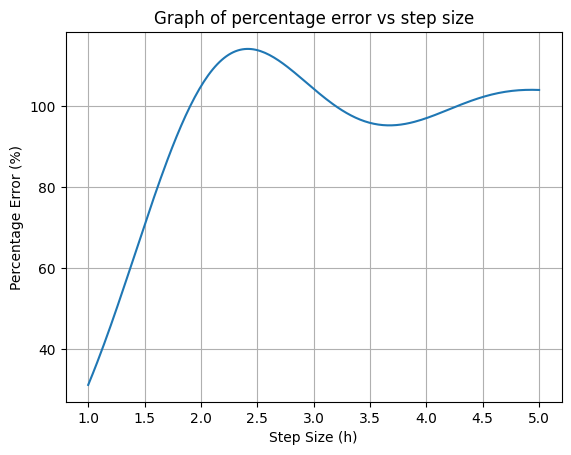

In [21]:
# For h>=1
h_arr = np.linspace(1, 5, 200)

plt.figure()
sol_numerical = central_diff(f_func, a, h_arr, order=2)
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical))
plt.xlabel("Step Size (h)")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs step size")
plt.grid()
plt.show()

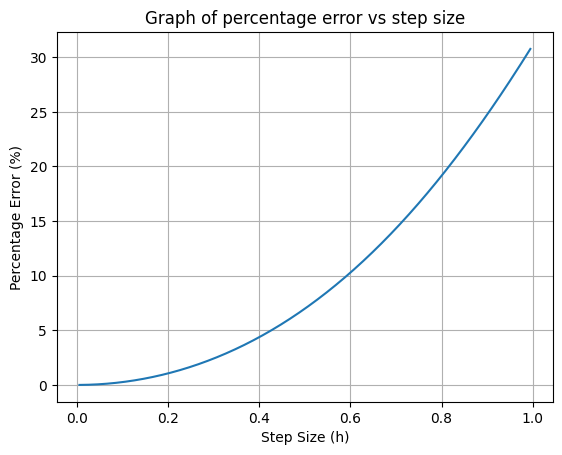

In [22]:
# For 0<h<1
h_arr = np.linspace(0, 1, 200)[1:-1]

plt.figure()
sol_numerical = central_diff(f_func, a, h_arr, order=2)
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical))
plt.xlabel("Step Size (h)")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs step size")
plt.grid()
plt.show()

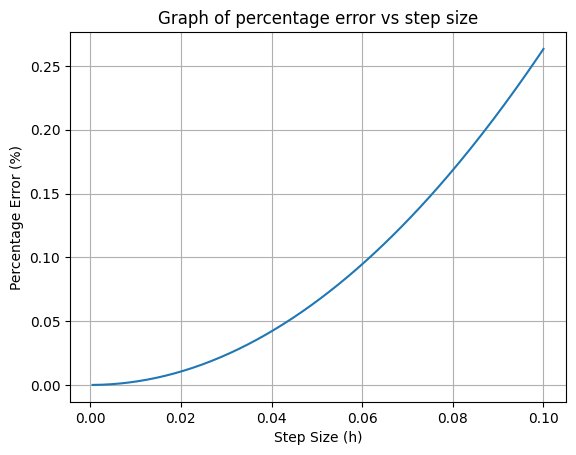

In [23]:
# For 0<h<=0.1
h_arr = np.linspace(0, 0.1, 200)[1:]

plt.figure()
sol_numerical = central_diff(f_func, a, h_arr, order=2)
plt.plot(h_arr, percent_err_func(sol_numerical, sol_analytical))
plt.xlabel("Step Size (h)")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs step size")
plt.grid()
plt.show()

## Numerical Integration

Numerical integration is a method that used to approximate the definite integral of a integrable function over a specified interval. The definite integral of a single varible function represents the signed area under the curve of the function within that interval (Refer AM2013 course notes for more details). Common method are,

1.   Trapezoidal Rule
$$
∫_a^b f(x) \,dx ≈ h\left( \frac{y_0+y_1}{2} \right) + h\left( \frac{y_1+y_2}{2} \right) + ⋯ + h\left( \frac{y_{n-1}+y_n}{2} \right)
$$
2.   Simpson's Rule
$$
\int_{a}^{b} f(x) \,dx \approx h\left( \frac{y_0+4y_1+y_2}{3} \right) + h\left( \frac{y_2+4y_3+y_4}{3} \right) + ⋯ +h\left( \frac{y_{n-2}+4y_{n-1}+y_n}{3} \right)
$$

Let's define a function $f(x) = xsin(x)$. Suppose $∫_0^{π} f(x) \,dx$ need to be calculated. The analytical solution can be obtained by using **SymPy**.

In [2]:
x = smp.symbols('x', real=True)
f = x*smp.sin(x)
display(f)

x*sin(x)

In [3]:
int_analytical = smp.integrate(f, (x, 0, smp.pi))
display(int_analytical)
sol_analytical = int_analytical.evalf()
print(f"Analytical solution = {sol_analytical}")

pi

Analytical solution = 3.14159265358979


Now let's solve this by using numerical methods.

In [4]:
def trapezoidal_integration(f, a, b, n):
  """
  Function to get numerical intigration of f in [a, b] by trapezoidal rule.
  f (function): The function to be integrated
  a (float): The lower bound of integral
  b (float): The upper bound of integral
  n (int): The number of subintervals
  """
  h = (b-a) / n
  x_i = a
  integral = 0
  for i in range(n):
    integral += (f(x_i)+f(x_i + h)) * (h/2)
    x_i += h
  return integral

In [5]:
def simpsons_rule(f, a, b, n):
  """
  Function to get numerical intigration of f in [a, b] by simpson's rule.
  f (function): The function to be integrated
  a (float): The lower bound of integral
  b (float): The upper bound of integral
  n (int): The number of subintervals
  """
  if n%2 != 0:
    print("Simpson's Rule cannot be apply.")
    return None
  h = (b-a) / n
  x_i = a
  integral = 0
  for i in range(int(n/2)):
    integral += (f(x_i)+4*f(x_i + h)+f(x_i + 2*h)) * (h/3)
    x_i += 2*h
  return integral

In [6]:
f_func = lambda x: x*np.sin(x)
percent_err_func = lambda sol_numerical, sol_analytical: np.abs((sol_numerical-sol_analytical)/sol_analytical)*100

In [7]:
a, b = 0, np.pi     # lower and upper bound of the integral
h = 0.01            # step size
n = int((b-a)/h)    # number of sub interval

In [8]:
sol_numerical = trapezoidal_integration(f_func, a, b, n)
print(f"Integral by trapezoidal rule = {sol_numerical}")
print(f"% error = {percent_err_func(sol_numerical, sol_analytical)}")

Integral by trapezoidal rule = 3.141566447042867
% error = 0.000834180296938411


In [9]:
sol_numerical = simpsons_rule(f_func, a, b, n)
print(f"Integral by simpson's rule = {sol_numerical}")
print(f"% error = {percent_err_func(sol_numerical, sol_analytical)}")

Integral by simpson's rule = 3.141592653764668
% error = 5.56643717391444E-9


Let's find the variation of percentage error with respect to number of sub intervals $(n)$. The Simpson's rule requires the number of sub-intervals to be an even number to apply the rule. Therefore, if there are odd number of sub-intervals we have to
apply some other technique to compute last iteration. (Ex: apply trapezoidal rule
for last sub-interval)

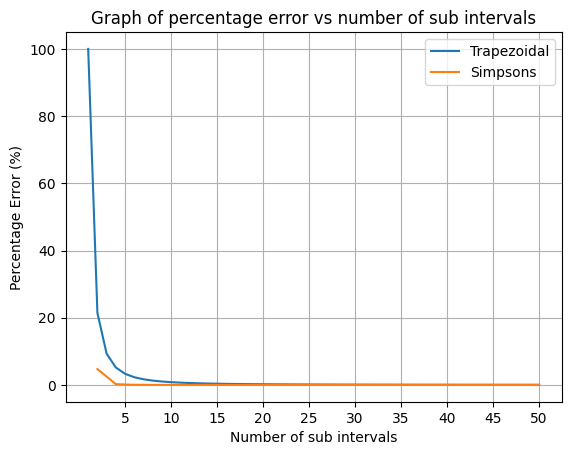

In [10]:
n_arr = np.arange(1, 51)
n_arr_simpson = n_arr[n_arr%2 == 0]
sol_numerical = np.zeros_like(n_arr).astype(float)

plt.figure()
for i, n in enumerate(n_arr):
  sol_numerical[i] = trapezoidal_integration(f_func, a, b, n)
plt.plot(n_arr, percent_err_func(sol_numerical, sol_analytical), label="Trapezoidal")

sol_numerical = np.zeros_like(n_arr_simpson).astype(float)
for i, n in enumerate(n_arr_simpson):
  sol_numerical[i] = simpsons_rule(f_func, a, b, n)
plt.plot(n_arr_simpson, percent_err_func(sol_numerical, sol_analytical), label="Simpsons")

plt.xlabel("Number of sub intervals")
plt.ylabel("Percentage Error (%)")
plt.title("Graph of percentage error vs number of sub intervals")
plt.xticks(n_arr[n_arr%5 == 0])
plt.grid()
plt.legend()
plt.show()

By this graph, whenever number of sub intervals increases the percentage error converges to zero (since $h→0$). That implies that accuracy of the approximation is increases. And also by this graph clearly see that the percentage error of Simpson's rule approximation converges to zero with higher rate than trapezoidal rule's percentage error.